<a href="https://colab.research.google.com/github/mohamedbakrey12/Advanced-Data-Science/blob/master/Version1_for_new_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'breast-ultrasound-images-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1209633%2F2021025%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240526%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240526T094454Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8d7521a7c8ae4be677faddfb9f287d8295244d299353effa91b031e6fbf4429ddbef6318e48a59670b24c1e910b1604c988ab58e45f0af530ae70a35b214d93b991c04968f0ff4128818d2026a1ca4d801be85f823c336e5cedeec7fe1b463a8828fdc82c3917a1481ffe0c0dce85eb7ea076f9aa8068a37deb96833c7c54e44506c9d634decde5890415800ef4809e11d0069bdd9fef5645ea1643b7fe414a49e042c609e2b014eedb14f5ee7cccc671d6c3efe5577acde765547627450c577d662febfebcc068e1d9a84bb4c0a0bde69d433eb783bb87af2d62b3e8e820998de8d6b6eee7c605085781f1633a00dc38c6a056ada23eaeb00109daecc945e03'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 204421470 bytes downloaded
Downloaded and uncompressed: breast-ultrasound-images-dataset
Data source import complete.


# `Ultrasound Breast Images Classification Project`

## `Project Overview`
In this project, our objective is to develop a classification system for Ultrasound Breast Images. We will employ various deep learning models to achieve this goal.

## `Project Pipeline`

1. **`Library Setup`**
   - Importing the necessary libraries for the project.

2. **`Data Loading`**
   - Loading the Ultrasound Breast Images dataset.

3. **`Data Preprocessing`**
   - Preprocessing the dataset to prepare it for model training.

4. **Data Generation**
   - Generating three subsets of data for:
     - Training
     - Validation
     - Testing

5. **`Model Selection`**
   - Exploring and selecting suitable deep learning models for the classification the prject:
     - `DenseNet169`
     - `ResNet152`
     - `Convolutional Neural Network (CNN)`
     - `VGG19`
     - `MobileNetV2`
     - `Xception`

6. **`Model Training`**
   - Training the selected models on the preprocessed data.

7. **`Model Testing`**
   - Testing the trained models to evaluate their performance.

8. **`Model Evaluation`**
   - Assessing and comparing the performance of the models based on evaluation metrics.

This project aims to build a robust classification system for Ultrasound Breast Images, enabling accurate identification and categorization of images for medical applications.

# Loading the Library

we  have imported a variety of Python libraries, including those for working with data, visualization, deep learning, and evaluation.
1. **System and File Handling**:
   - `os`: For operating system-related functions.
   - `pathlib.Path`: Part of the pathlib library, used for working with file paths.
   - `glob.glob`: For finding files matching a specified pattern.

2. **Data Visualization**:
   - `matplotlib.pyplot`: For creating plots and visualizations.
   - `seaborn`: Built on top of matplotlib, seaborn provides a high-level interface for creating informative and attractive statistical graphics.
   - `matplotlib.cm`: Colormap module for color maps in plots.

3. **Data Manipulation**:
   - `numpy`: For numerical operations on arrays and matrices.
   - `pandas`: For data manipulation and analysis, particularly handling data in tabular form.
   - `time`: For measuring time-related functions.
   - `PIL.Image`: Part of the Python Imaging Library, used for working with images.

4. **Machine Learning and Deep Learning**:
   - `tensorflow` and `keras`: For building and training deep learning models.
   - `sklearn.model_selection.train_test_split`: For splitting data into training and testing sets.
   - `tensorflow.keras.callbacks`: Callbacks for customizing training loops and behaviors.
   - `tensorflow.keras.models.load_model`: To load pre-trained models.

5. **Data Augmentation**:
   - `ImageDataGenerator` from `keras.preprocessing.image`: For data augmentation during model training.

6. **Metrics and Optimizers**:
   - Various metrics and optimizers from TensorFlow and TensorFlow Addons (TFA) for evaluating model performance and optimizing the training process.

Overall, these libraries provide a comprehensive set of tools for data preprocessing, model building, training, evaluation, and visualization, making them suitable for our` Ultrasound Breast Images Classification Project`.

In [2]:
# Import necessary system libraries
import os
from pathlib import Path
from glob import glob
import tensorflow as tf
# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

# Import libraries for working with data
import numpy as np
import pandas as pd
import time
from PIL import Image

# Set random seed for reproducibility
np.random.seed(11)

# Import itertools for creating combinations
import itertools

# Import TensorFlow and Keras
import tensorflow as tf
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras import backend as K
import random
import urllib.request
import matplotlib.image as mpimg
from skimage import io
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

# Import TensorFlow libraries for building models
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization
from keras.layers import MaxPooling2D

# Import metrics and optimizers
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import plot_model
#import tensorflow_addons as tfa
from tensorflow.keras import metrics
#from tensorflow_addons.metrics import F1Score
from tensorflow.keras.optimizers import Adam
#from tensorflow_addons.metrics import MatthewsCorrelationCoefficient


# Data Loading

In [3]:
# Define the path to the training data
train_data_path = '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT'

# Check if the path exists
if os.path.exists(train_data_path):
    # Use glob to get a list of file paths in the directory
    train_data_files = glob(os.path.join(train_data_path, '*'))

    # Print the list of file paths to verify
    print('Successfully Read the data')
else:
    print("The specified path does not exist.")


Successfully Read the data


# Data Preprocessing

### Train image

In [4]:
# Create a Path object for the 'train' directory
image_from_dir = Path(train_data_path)

# Get file paths for images from the directory
# The following line collects jpg and png files by specifying the extensions
filepaths_for_train = (
                                                    list(image_from_dir.glob('**/*.jpg')) +  # Collect jpg files
                                                    list(image_from_dir.glob('**/*.png'))    # Collect png files
                                                )


In [5]:
# Extract labels from file paths
labels_train = list(
    map(
                                    lambda x: os.path.split(os.path.split(x)[0])[1],
                                    filepaths_for_train
                                )
                            )


In [6]:
# Convert the list of file paths to a Pandas Series
filepaths = pd.Series(filepaths_for_train, name='Filepath').astype(str)

# Convert the list of labels to a Pandas Series
labels = pd.Series(labels_train, name='Label')


In [7]:
# Concatenate the 'filepaths' and 'labels' Pandas Series along the columns (axis=1)
image_df = pd.concat([filepaths, labels], axis=1)


In [8]:
# Check the number of images in the DataFrame
image_df['Filepath'].shape[0]

1578

In [9]:
# Check the number for each label that we have in the train data
image_df['Label'].value_counts()

Label
benign       891
malignant    421
normal       266
Name: count, dtype: int64

#### Show some of image that we have in the dataset


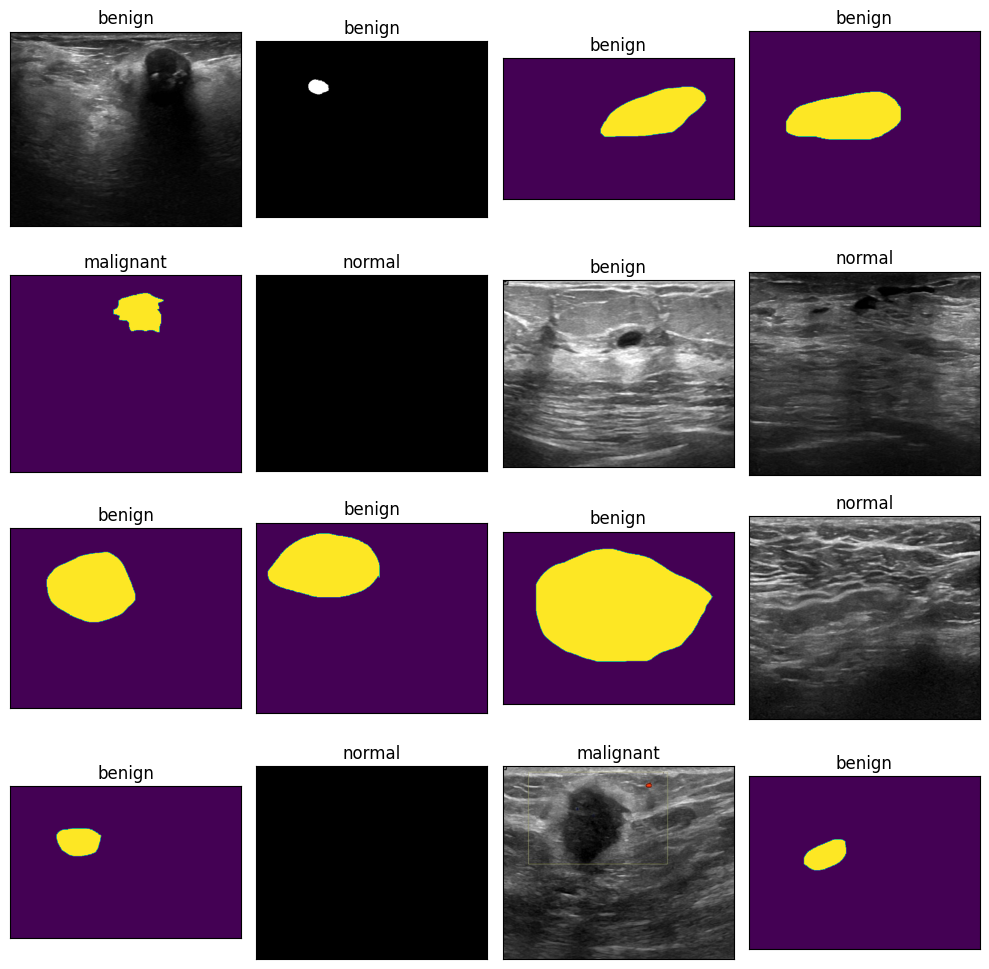

In [10]:
# Generate 16 random indices for selecting images
random_index = np.random.randint(0, len(image_df), 16)

# Create a 4x4 grid for displaying images
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

# Iterate through the axes and display images with labels
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


#### Spliting the data

In [11]:
# Batch size for the data
batch_size = 32
# The size for the image
target_size = (224, 224)

####  Using Train test Split to split the data

In [12]:
# Split the dataset into train and test dataframes
# test_size=0.2 specifies that 20% of the data will be used for testing
# shuffle=True shuffles the data before splitting
# random_state=42 sets a random seed for reproducibility
train_df, test_df = train_test_split(image_df, test_size=0.2, shuffle=True, random_state=42)


# Data Generation

In the code we work on configuring data generators for both training and testing using `ImageDataGenerator`. Here's an explanation of what each part of the code does:

1. **Training Data Generator** (`train_generator`):
   - You create a `train_generator` using `ImageDataGenerator` to perform data augmentation and preprocessing on the training data.
   - `preprocessing_function=tf.keras.applications.efficientnet.preprocess_input` specifies the preprocessing function to be applied to each image. In this case, it's the preprocessing function for the EfficientNet model.
   - `validation_split=0.2` indicates that 20% of the training data will be set aside for validation during training. This is typically used for monitoring the model's performance during training.

2. **Testing Data Generator** (`test_generator`):
   - we create a `test_generator` using `ImageDataGenerator` to preprocess the testing data.
   - Similar to the training generator, you specify the preprocessing function as `tf.keras.applications.efficientnet.preprocess_input`.

These generators are often used with Keras models to load and preprocess images in batches during training and testing.

In [13]:
# Configure the training data generator
train_generator = ImageDataGenerator(
                                                                    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
                                                                    validation_split=0.2  # Set aside 20% of the data for validation during training
)

# Configure the testing data generator
test_generator = ImageDataGenerator(
                                                                   preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)


### Train data generation

In this code, we're using the `train_generator.flow_from_dataframe()` method to create a data generator for training images. Here's an explanation of what each part of the code does:

- `train_image_df`: This is the DataFrame containing file paths and labels for training images. It was previously created using Pandas.

- `x_col='Filepath'`: we specify the column in the DataFrame that contains the file paths of the images.

- `y_col='Label'`: we specify the column in the DataFrame that contains the labels corresponding to the images.

- `target_size`: This parameter specifies the target size to which the images will be resized.
- `color_mode='rgb'`: This indicates that the images are in RGB color mode.

- `class_mode='categorical'`: we specify the type of classification, which is categorical in this case, indicating that labels are one-hot encoded.

- `batch_size`: This parameter sets the batch size for training. It determines how many images are processed in each training step.

- `shuffle=True`: we set this to `True` to shuffle the data for each epoch, which helps improve training performance.

- `seed=42`: This sets a random seed for reproducibility, ensuring that the same random shuffling order is used if we need to reproduce the results.

- `subset='training'`: we specify that this data generator is for the training subset of the data.

Now we can use the data to start train our model

In [14]:
# Create a data generator for training images
train_images = train_generator.flow_from_dataframe(
                                                                dataframe=train_df,      # DataFrame containing file paths and labels
                                                                x_col='Filepath',              # Column containing image file paths
                                                                y_col='Label',                 # Column containing image labels
                                                                target_size=target_size,       # Target size for resizing images
                                                                color_mode='rgb',              # Color mode for images (RGB)
                                                                class_mode='categorical',      # Type of classification (categorical in this case)
                                                                batch_size=batch_size,         # Batch size for training
                                                                shuffle=True,                  # Shuffle the data for each epoch
                                                                seed=42,                       # Random seed for reproducibility
                                                                subset='training'              # Subset of data (training set)
)


Found 1010 validated image filenames belonging to 3 classes.


### Validation data generation

In [15]:
# Create a data generator for validation images
val_images = train_generator.flow_from_dataframe(
                                                                dataframe=train_df,      # DataFrame containing file paths and labels
                                                                x_col='Filepath',              # Column containing image file paths
                                                                y_col='Label',                 # Column containing image labels
                                                                target_size=target_size,       # Target size for resizing images
                                                                color_mode='rgb',              # Color mode for images (RGB)
                                                                class_mode='categorical',      # Type of classification (categorical in this case)
                                                                batch_size=batch_size,         # Batch size for validation
                                                                shuffle=True,                  # Shuffle the data for each epoch
                                                                seed=42,                       # Random seed for reproducibility
                                                                subset='validation'            # Subset of data (validation set)
    )


Found 252 validated image filenames belonging to 3 classes.


### Test Image Generation

In [16]:
# Create a data generator for test images
test_images = test_generator.flow_from_dataframe(
                                                                dataframe=test_df,              # DataFrame containing file paths and labels
                                                                x_col='Filepath',               # Column containing image file paths
                                                                y_col='Label',                  # Column containing image labels
                                                                target_size=target_size,        # Target size for resizing images
                                                                color_mode='rgb',               # Color mode for images (RGB)
                                                                class_mode='categorical',       # Type of classification (categorical in this case)
                                                                batch_size=batch_size,          # Batch size for testing
                                                                shuffle=False                    # Do not shuffle the data for testing
)


Found 316 validated image filenames belonging to 3 classes.


# Using Deep Learning Models

In [17]:
# That is the heiht for the image.
img_height=224
# That is the width for the image.
img_width=224
# That is the number of classes that we have in the dataset.
num_class=2

## Using DenseNet169 as first model

Here we are importing and initializing the DenseNet169 model with pre-trained weights from ImageNet. Here's an explanation of each part of the code:

- `from tensorflow.keras.applications import DenseNet169`: This line imports the DenseNet169 model from the `tensorflow.keras.applications` module. DenseNet169 is a convolutional neural network architecture that has been pre-trained on the ImageNet dataset.

- `dense = DenseNet169(weights="imagenet", include_top=False, input_shape=(224, 224, 3))`: Here, we initialize the `dense` variable as a DenseNet169 model with the following arguments:

  - `weights="imagenet"`: This specifies that you want to use the pre-trained weights from the ImageNet dataset. Using pre-trained weights can be beneficial for transfer learning.
  - `include_top=False`: You set this to `False` to exclude the top (classification) layer of the model.
  - `input_shape=(224, 224, 3)`: This defines the input shape for the model. DenseNet169 expects input images to have dimensions of 224x224 pixels with 3 color channels (RGB).

After running this code, the `dense` variable will hold an instance of the DenseNet169 model with the specified configurations, and you can use it for various tasks, such as feature extraction or fine-tuning for a specific image classification task.

In [18]:
# Import the DenseNet169 model with pre-trained weights
from tensorflow.keras.applications import DenseNet169

# Initialize the DenseNet169 model
dense = DenseNet169(
                                    weights="imagenet",      # Use pre-trained weights from ImageNet
                                    include_top=False,       # Exclude the top (classification) layer
                                    input_shape=(224, 224, 3)  # Input shape for the model
)

51877672/51877672 [==============================] - 2s 0us/step


In [19]:
# Iterate through the first 169 layers of the 'dense' model
for layer in dense.layers[:169]:
    # Set the 'trainable' attribute to 'False'
    layer.trainable = False

Here, we are creating a Sequential model in Keras for binary classification using a DenseNet169 base model with additional layers. Here's an explanation of each part of the code:

1. `model = Sequential()`: This line initializes a Sequential model. A Sequential model is a linear stack of layers where we can add layers one by one.

2. `model.add(dense)`: we add the DenseNet169 base model (previously initialized) to the Sequential model. This serves as the feature extractor, where the DenseNet169 layers are used to extract meaningful features from the input images.

3. `model.add(MaxPooling2D())`: You add a MaxPooling2D layer. MaxPooling2D is a downsampling operation that reduces the spatial dimensions of the feature maps while retaining the most important information.

4. `model.add(BatchNormalization())`: A BatchNormalization layer is added. Batch normalization helps stabilize and speed up training by normalizing the activations of the previous layer.

5. `model.add(Dropout(0.3))`: A Dropout layer is added with a dropout rate of 0.3. Dropout is a regularization technique that helps prevent overfitting by randomly setting a fraction of input units to zero during training.

6. `model.add(Flatten())`: The output from the previous layer is flattened, converting it into a one-dimensional vector. This is a common step before adding fully connected layers.

7. `model.add(Dense(512, activation="relu"))`: A Dense layer with 512 units and ReLU activation function is added. This layer is responsible for learning high-level representations of the flattened features.

8. `model.add(Dropout(0.1))`: Another Dropout layer is added with a dropout rate of 0.1 for additional regularization.

9. `model.add(Dense(2, activation="sigmoid"))`: Finally, a Dense layer with 2 units and a sigmoid activation function is added. This is the output layer for binary classification. The sigmoid activation function is used to produce probability scores for each of the two classes.

This Sequential model is ready to train `ان شاء الله`

In [20]:
# Create a Sequential model
model = Sequential()

# Add a dense layer (assuming 'dense' is defined elsewhere)
model.add(dense)

# Add a MaxPooling2D layer
model.add(MaxPooling2D())

# Add a BatchNormalization layer
model.add(BatchNormalization())

# Add a Dropout layer with a dropout rate of 0.3
model.add(Dropout(0.3))

# Flatten the output from the previous layer
model.add(Flatten())

# Add a Dense layer with 512 units and ReLU activation function
model.add(Dense(512, activation="relu"))

# Add a Dropout layer with a dropout rate of 0.5
model.add(Dropout(0.5))

# Add a final Dense layer with 2 units and sigmoid activation for binary classification
model.add(Dense(3, activation="sigmoid"))

In [21]:
# Check the summary for the model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 7, 7, 1664)        12642880  
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 1664)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 3, 3, 1664)        6656      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 3, 3, 1664)        0         
                                                                 
 flatten (Flatten)           (None, 14976)             0         
                                                                 
 dense (Dense)               (None, 512)               7

#### Compile the model

In [22]:
# Define a list of metrics to be used for model evaluation
metrics = [
                                                        'accuracy',                                          # Accuracy
                                                        tf.keras.metrics.Precision(name='precision'),        # Precision
                                                        tf.keras.metrics.Recall(name='recall'),              # Recall
                                                        #tf.keras.metrics.F1Score(),           # F1 Score
                                                        #MatthewsCorrelationCoefficient(num_classes=num_class, name='mc'),  # Matthews Correlation Coefficient
                                                        tf.keras.metrics.TruePositives(name='tp'),           # True Positives
                                                        tf.keras.metrics.TrueNegatives(name='tn'),           # True Negatives
                                                        tf.keras.metrics.FalseNegatives(name='fn'),          # False Negatives
                                                        tf.keras.metrics.FalsePositives(name='fp')           # False Positives
]

In [23]:

# Compile the model using the Adamax optimizer and binary cross-entropy loss
model.compile(
                                                        optimizer='adam',         # Adamax optimizer with learning rate 0.0001
                                                        loss="categorical_crossentropy",          # Binary cross-entropy loss for binary classification
                                                        metrics=metrics                      # Use the defined list of metrics for evaluation
)

#### Fiting the model and start traning it.

In [24]:
# Train the model with the specified callbacks
history = model.fit(
                                                    train_images,                # Training data generator
                                                    validation_data=val_images,  # Validation data generator
                                                    epochs=10,                   # Number of epochs
                                                    batch_size=32,               # Batch size (customize as needed)
                                                    )

Epoch 1/10
32/32 [==============================] - 91s 772ms/step - loss: 1.7653 - accuracy: 0.6752 - precision: 0.5481 - recall: 0.8010 - tp: 809.0000 - tn: 1353.0000 - fn: 201.0000 - fp: 667.0000 - val_loss: 3512.3223 - val_accuracy: 0.5992 - val_precision: 0.4204 - val_recall: 0.7540 - val_tp: 190.0000 - val_tn: 242.0000 - val_fn: 62.0000 - val_fp: 262.0000
Epoch 2/10
32/32 [==============================] - 11s 345ms/step - loss: 0.7670 - accuracy: 0.7713 - precision: 0.5537 - recall: 0.9297 - tp: 939.0000 - tn: 1263.0000 - fn: 71.0000 - fp: 757.0000 - val_loss: 1600.7003 - val_accuracy: 0.6389 - val_precision: 0.4932 - val_recall: 0.8571 - val_tp: 216.0000 - val_tn: 282.0000 - val_fn: 36.0000 - val_fp: 222.0000
Epoch 3/10
32/32 [==============================] - 11s 352ms/step - loss: 0.5220 - accuracy: 0.8198 - precision: 0.6158 - recall: 0.8980 - tp: 907.0000 - tn: 1454.0000 - fn: 103.0000 - fp: 566.0000 - val_loss: 1409642.2500 - val_accuracy: 0.5556 - val_precision: 0.5556 - 

In [25]:
# Model Evaluation
model.evaluate(test_images)

10/10 [==============================] - 2s 201ms/step - loss: 0.8802 - accuracy: 0.7437 - precision: 0.5332 - recall: 0.9399 - tp: 297.0000 - tn: 372.0000 - fn: 19.0000 - fp: 260.0000


[0.8801789283752441,
 0.7436708807945251,
 0.5332136154174805,
 0.9398733973503113,
 297.0,
 372.0,
 19.0,
 260.0]

##### Plot the figure for the DensNet169 model

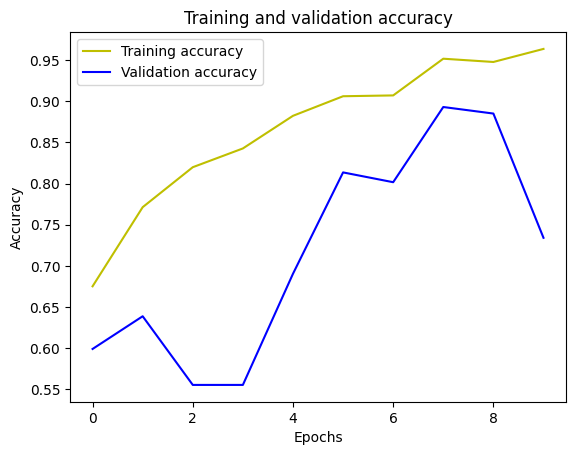

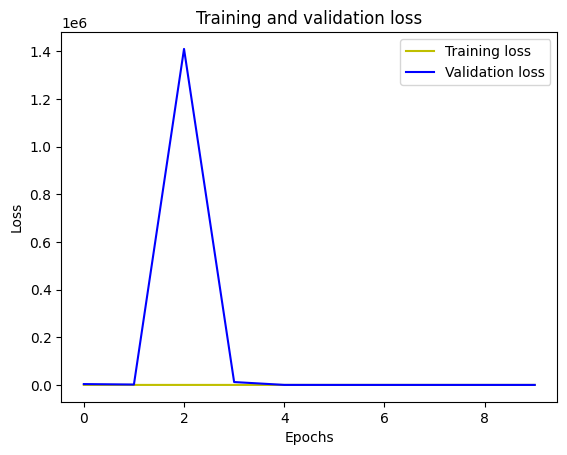

In [26]:
# Get the training accuracy and validation accuracy from the history of the model
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Get the training loss and validation loss from the history of the model
loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a range of epochs for the x-axis
epochs = range(len(accuracy))

# Plot training and validation accuracy
plt.plot(epochs, accuracy, 'y', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Show the accuracy plot
plt.show()

# Create a new figure for plotting training and validation loss
plt.figure()

# Plot training and validation loss
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Show the loss plot
plt.show()

#### Predict of the Model

The code we provided performs the following steps to predict labels for test images using DensNet169 model:

1. `model.predict(test_images)`: This line uses the trained model to predict the class probabilities for each test image. It applies the model's prediction function to the test images.

2. `np.argmax(pred, axis=1)`: After obtaining the class probabilities (`pred`), this line finds the class index with the highest probability for each test image by taking the argmax along `axis=1`. This gives us the predicted class index for each test image.

3. `labels = train_images.class_indices`: This line retrieves the dictionary that maps class labels to class indices. It assumes that the `train_images` generator was used for training and that it has the `class_indices` attribute.

4. `labels = dict((v, k) for k, v in labels.items())`: This line creates a reverse mapping of class indices to class labels. It swaps the keys and values in the dictionary.

5. `pred_label = [labels[k] for k in pred]`: Using the reverse mapping created in the previous step, this line converts the predicted class indices (`pred`) into their corresponding class labels.

6. `print(f'The first 5 predictions: {pred_label[:5]}')`: Finally, this line prints the first 5 predicted labels from the `pred_label` list.

So, the output of this code will be the first 5 predicted labels for the test images based on the trained model.

In [27]:
# Predict the labels for the test images using the trained model
pred = model.predict(test_images)

# Get the class with the highest probability as the predicted class
pred = np.argmax(pred, axis=1)

# Map the class indices to their corresponding labels using the 'train_images.class_indices' dictionary
labels = train_images.class_indices
labels = dict((v, k) for k, v in labels.items())
pred_label = [labels[k] for k in pred]

# Display the first 5 predicted labels
print(f'The first 5 predictions: {pred_label[:5]}')

10/10 [==============================] - 8s 201ms/step
The first 5 predictions: ['benign', 'benign', 'benign', 'benign', 'malignant']


#### Here I work to show the model of prediction by showing some image that model predict it.


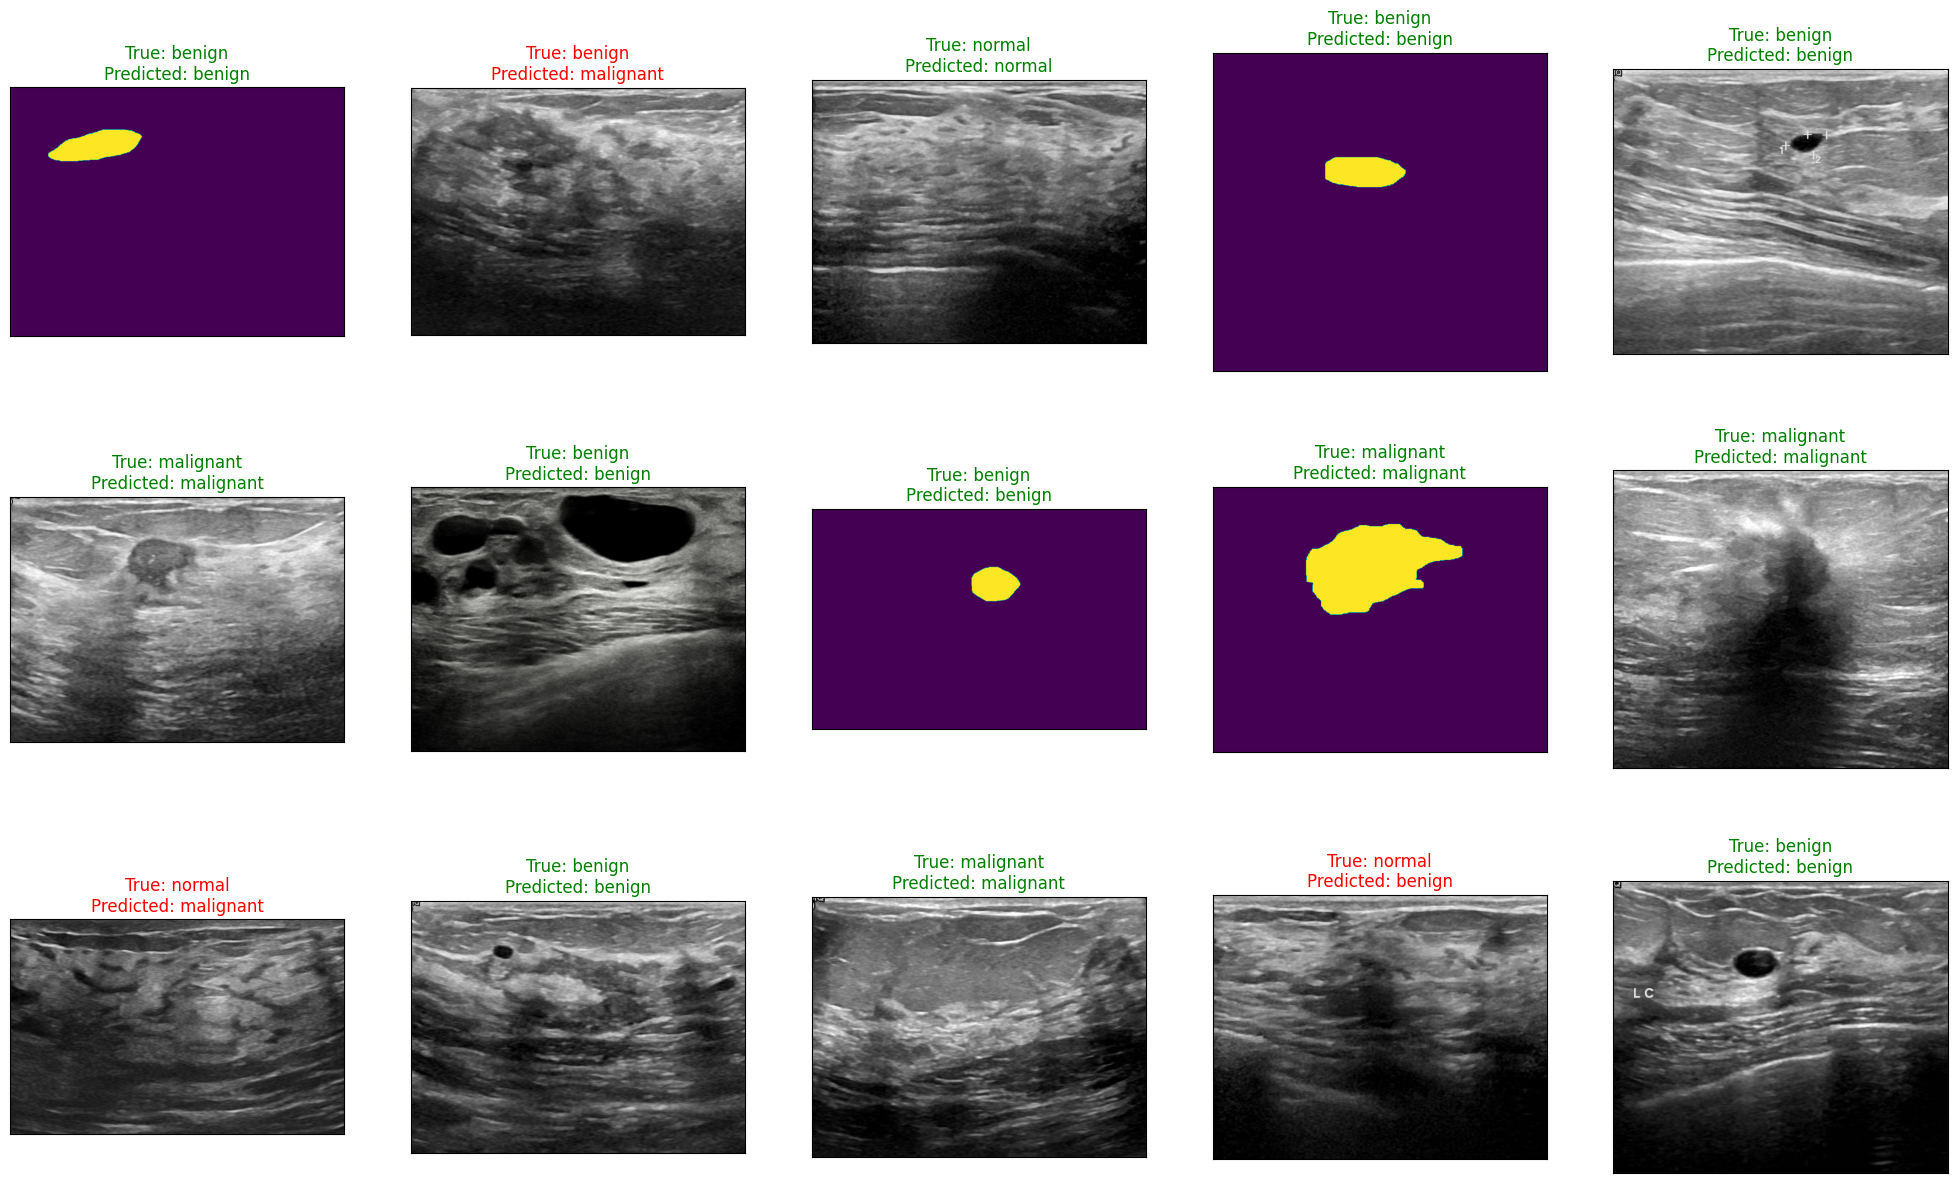

In [28]:
# Generate 15 random indices for selecting images
random_index = np.random.randint(0, len(test_df) - 1, 15)

# Create a subplot grid for displaying images
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

# Iterate through the axes and display images, true labels, and predicted labels
for i, ax in enumerate(axes.flat):
    # Display the image
    ax.imshow(plt.imread(test_df.Filepath.iloc[random_index[i]]))

    # Determine the color for the title (green if the prediction is correct, red if incorrect)
    if test_df.Label.iloc[random_index[i]] == pred_label[random_index[i]]:
        color = "green"
    else:
        color = "red"

    # Set the title with the true and predicted labels
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred_label[random_index[i]]}", color=color)

# Display the subplot grid
plt.show()

# Show the Classification Report

In [29]:
# Generate a classification report by comparing the true classes (test_images.classes) with predicted classes (pred)
report = classification_report(test_images.classes, pred)
report

'              precision    recall  f1-score   support\n\n           0       0.76      0.88      0.82       165\n           1       0.69      0.93      0.80        88\n           2       1.00      0.13      0.23        63\n\n    accuracy                           0.74       316\n   macro avg       0.82      0.65      0.61       316\nweighted avg       0.79      0.74      0.69       316\n'

#### Plot the Confusion Matrix for the Model.

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.binary):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # Create and display the confusion matrix plot
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, weight='bold', fontsize=16)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=12, weight='bold',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=16, weight='bold')
    plt.xlabel('Predicted label', fontsize=16, weight='bold')

Normalized confusion matrix


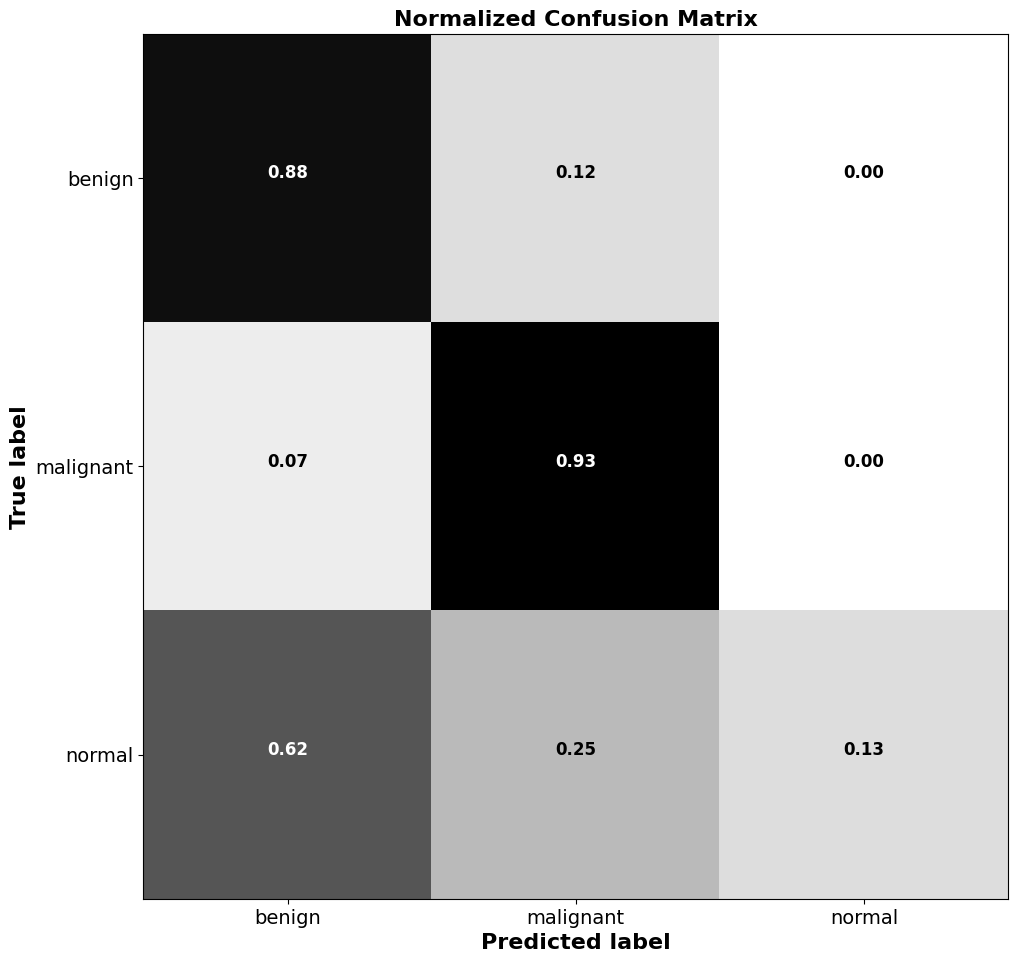

In [31]:
# Compute the confusion matrix
cnf_matrix = confusion_matrix(test_images.classes, pred)

# Set the display precision for the confusion matrix
np.set_printoptions(precision=2)

# Create a figure for the confusion matrix plot (size 10x10)
plt.figure(figsize=(10, 10))

# Plot the normalized confusion matrix using the plot_confusion_matrix function
plot_confusion_matrix(
    cnf_matrix,                          # Confusion matrix
    classes=['benign', 'malignant','normal'],     # Class labels
    normalize=True,                      # Normalize the matrix
    title='Normalized Confusion Matrix'  # Title for the plot
)

# Show the confusion matrix plot
plt.show()

# ResNet152

In [32]:
ResNet=tf.keras.applications.ResNet152(
                                            include_top=False,weights="imagenet",
                                            input_shape=(224,224,3),pooling='max')

234698864/234698864 [==============================] - 6s 0us/step


In [33]:
# Create a new Sequential model
model2 = Sequential()

# Add the ResNet model as the initial layer (assuming 'ResNet' is defined elsewhere)
model2.add(ResNet)

# Add a BatchNormalization layer
model2.add(BatchNormalization())

# Add a Dropout layer with a dropout rate of 0.3
model2.add(Dropout(0.3))

# Flatten the output from the previous layer
model2.add(Flatten())

# Add a Dense layer with 512 units and ReLU activation function
model2.add(Dense(512, activation="relu"))

# Add a Dropout layer with a dropout rate of 0.5
model2.add(Dropout(0.5))

# Add a final Dense layer with 2 units and sigmoid activation for binary classification
model2.add(Dense(3, activation="sigmoid"))

In [ ]:
model2.summary()    # Show the summary of the model2

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet152 (Functional)          │ ?                      │    58,370,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,370,944 (222.67 MB)

 Trainable params: 58,219,520 (222.09 MB)

 Non-trainable params: 151,424 (591.50 KB)

In [34]:
# Compi inle the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)

In [47]:
# Train the model with the specified callbacks
history = model2.fit(
                                                    train_images,                # Training data generator
                                                    validation_data=val_images,  # Validation data generator
                                                    epochs=15,                   # Number of epochs
                                                    batch_size=32,               # Batch size (customize as needed)
                                                    )

Epoch 1/15
32/32 [==============================] - 27s 851ms/step - loss: 1.9404 - accuracy: 0.5079 - precision: 0.4387 - recall: 0.7366 - tp: 744.0000 - tn: 1068.0000 - fn: 266.0000 - fp: 952.0000 - val_loss: 171713.8594 - val_accuracy: 0.5556 - val_precision: 0.5500 - val_recall: 0.5675 - val_tp: 143.0000 - val_tn: 387.0000 - val_fn: 109.0000 - val_fp: 117.0000
Epoch 2/15
32/32 [==============================] - 27s 847ms/step - loss: 1.6212 - accuracy: 0.5129 - precision: 0.4523 - recall: 0.7139 - tp: 721.0000 - tn: 1147.0000 - fn: 289.0000 - fp: 873.0000 - val_loss: 649915.3750 - val_accuracy: 0.5556 - val_precision: 0.4127 - val_recall: 0.8254 - val_tp: 208.0000 - val_tn: 208.0000 - val_fn: 44.0000 - val_fp: 296.0000
Epoch 3/15
32/32 [==============================] - 28s 866ms/step - loss: 2.0013 - accuracy: 0.5307 - precision: 0.4731 - recall: 0.5842 - tp: 590.0000 - tn: 1363.0000 - fn: 420.0000 - fp: 657.0000 - val_loss: 7450.4590 - val_accuracy: 0.5516 - val_precision: 0.4306

##### Plot the model2 learning

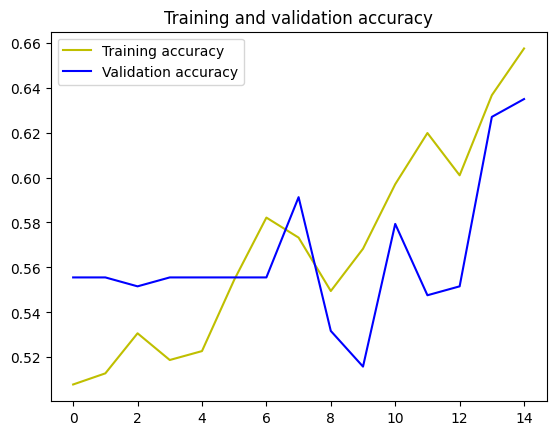

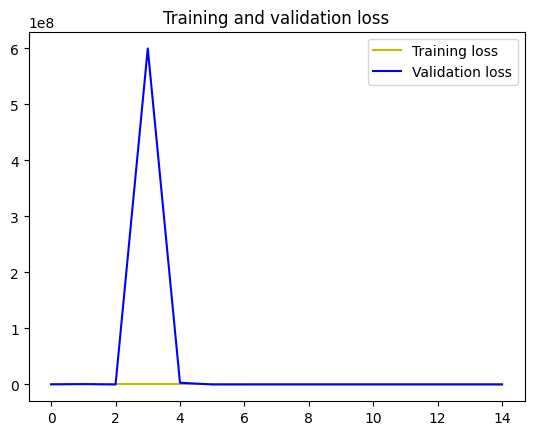

In [48]:
accuracy = history.history['accuracy']         # Get the accuracy from the history of the model.
val_accuracy = history.history['val_accuracy'] # Get the Validation of the model form the history of the model.

loss = history.history['loss']                 # Get the Loss of the Model from the history of the model.
val_loss = history.history['val_loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'y', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.legend()
plt.show()

##### Model Evaluation

In [49]:
# Evalute and testing the model
model2.evaluate(test_images)

10/10 [==============================] - 3s 251ms/step - loss: 3.1137 - accuracy: 0.6361 - precision: 0.6086 - recall: 0.7184 - tp: 227.0000 - tn: 486.0000 - fn: 89.0000 - fp: 146.0000


[3.1136891841888428,
 0.6360759735107422,
 0.6085790991783142,
 0.7183544039726257,
 227.0,
 486.0,
 89.0,
 146.0]

##### Model Prediction


In [50]:
# Predict the label of the test_images
pred = model2.predict(test_images)
pred = np.argmax(pred,axis=1)

# Here I work on maping the labels
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred_label = [labels[k] for k in pred]

# Display the result that will achive it form the model.
print(f'The first 5 predictions: {pred[:5]}')

10/10 [==============================] - 5s 245ms/step
The first 5 predictions: [0 0 0 0 0]


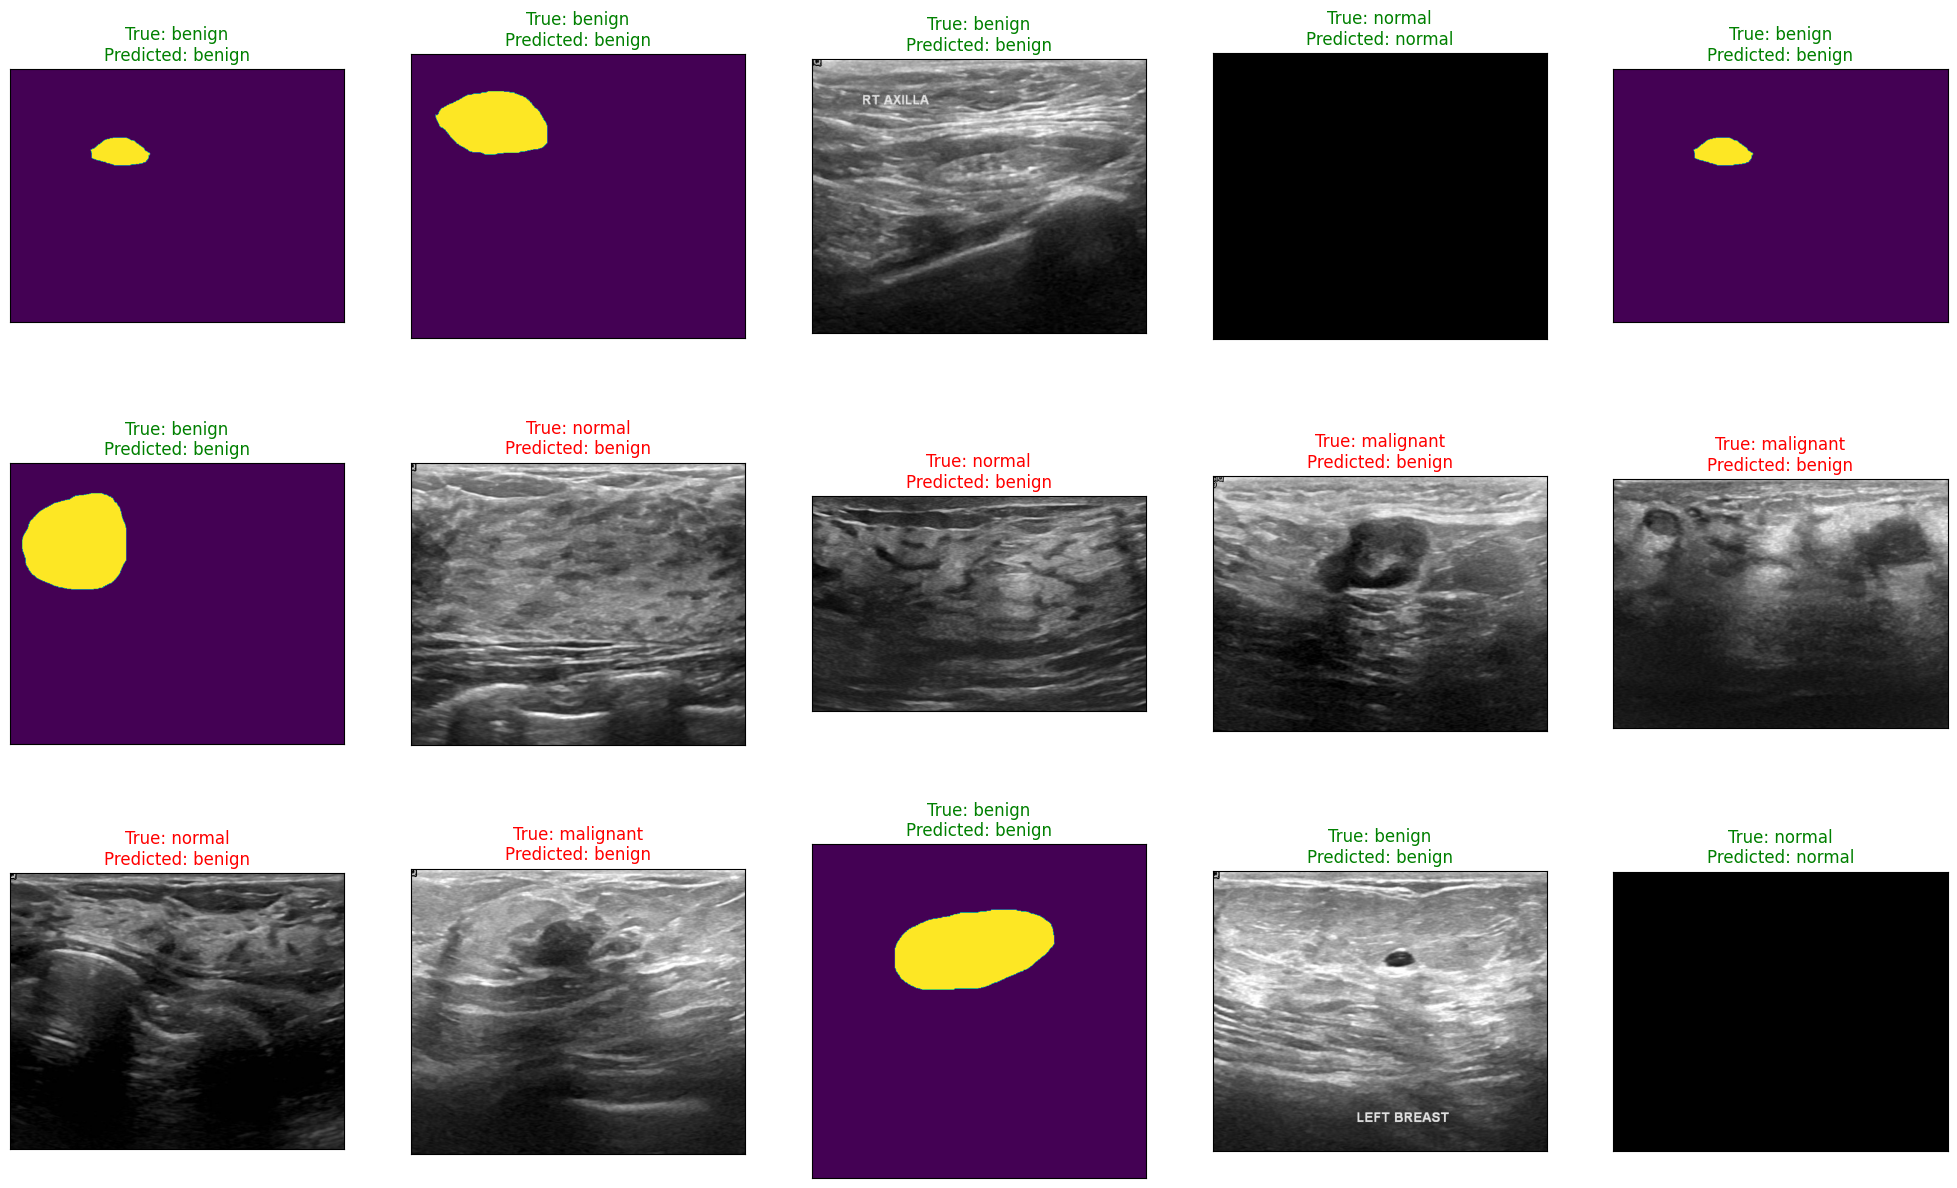

<Figure size 640x480 with 0 Axes>

In [51]:
# Here I Display 25 random pictures from the dataset with their labels and the image model pridict it right
random_index = np.random.randint(0, len(test_df) - 1, 15)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),   # Here I use the subplot form the matplotlib library.
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[random_index[i]]))
    if test_df.Label.iloc[random_index[i]] == pred_label[random_index[i]]:
        color = "green"
    else:
        color = "red"
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred_label[random_index[i]]}", color=color)
plt.show()
plt.tight_layout()

In [52]:
# Show the Classification Report for the model.
print(classification_report(test_images.classes, pred))    # It is take the Class of test image and predict of the models.

              precision    recall  f1-score   support

           0       0.59      0.98      0.74       165
           1       1.00      0.03      0.07        88
           2       0.92      0.57      0.71        63

    accuracy                           0.64       316
   macro avg       0.84      0.53      0.50       316
weighted avg       0.77      0.64      0.54       316



#### Confusion Matrix

Normalized confusion matrix


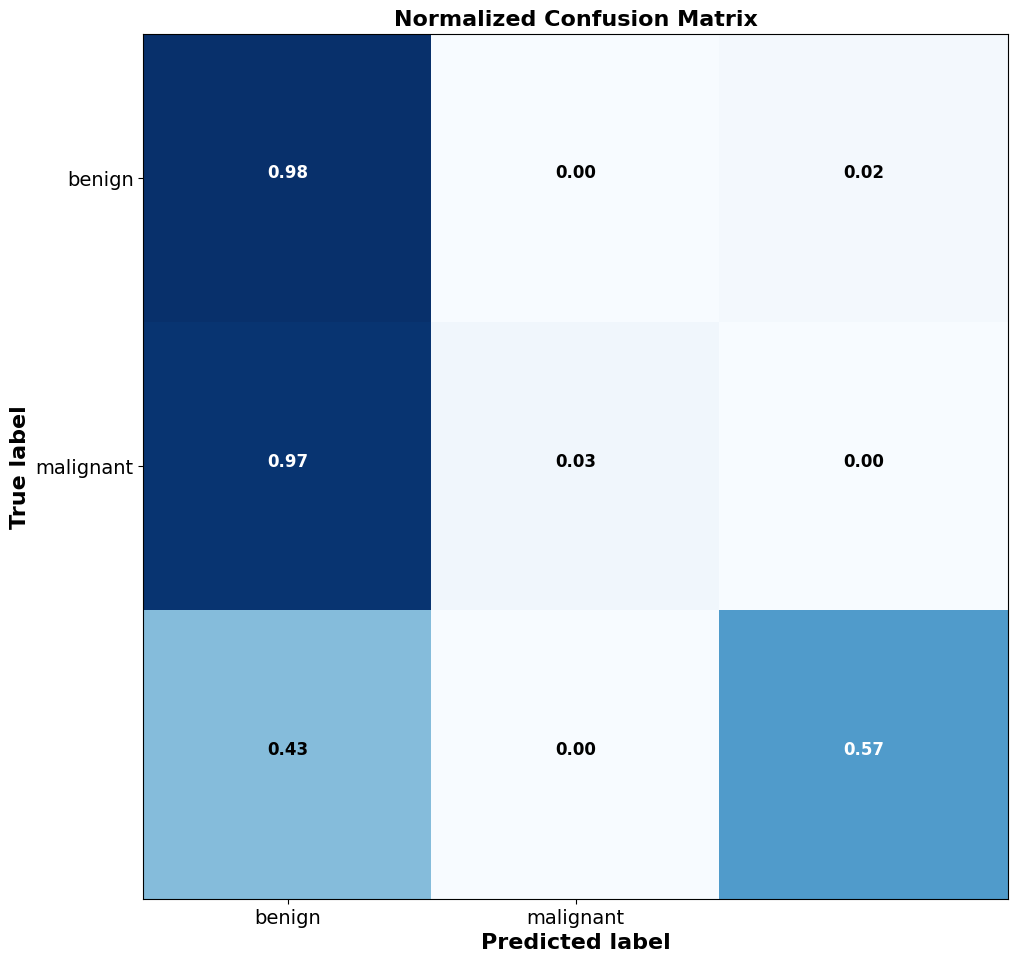

In [53]:
# Here I work to compute the confusion matrix
cnf_matrix = confusion_matrix(test_images.classes, pred) # here it take the class names and actual predict for the model.
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))   # Here I set the Size for the figure I set(40,40) becouse the number of class is verey big, to show the all class.
plot_confusion_matrix(cnf_matrix, classes=['benign','malignant'],   # This is the class that we have in the data set and work here.
                                               normalize=True,
                                                title='Normalized Confusion Matrix')
plt.show()

## Model CNN Model.

#####  Build the model CNN

In [36]:
# Create a new Sequential model
model3 = Sequential()

# Add a Conv2D layer with 32 filters, 3x3 kernel, ReLU activation, he_uniform initializer, and 'same' padding
model3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))

# Add BatchNormalization layer
model3.add(BatchNormalization())

# Add another Conv2D layer with 32 filters, 3x3 kernel, ReLU activation, he_uniform initializer, and 'same' padding
model3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

# Add MaxPooling2D layer with 2x2 pool size
model3.add(MaxPooling2D((2, 2)))

# Add BatchNormalization layer
model3.add(BatchNormalization())

# Add Dropout layer with a dropout rate of 0.3
model3.add(Dropout(0.3))

# Add Conv2D layer with 64 filters, 3x3 kernel, ReLU activation, he_uniform initializer, and 'same' padding
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

# Add BatchNormalization layer
model3.add(BatchNormalization())

# Add Conv2D layer with 64 filters, 3x3 kernel, ReLU activation, he_uniform initializer, and 'same' padding
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

# Add BatchNormalization layer
model3.add(BatchNormalization())

# Add MaxPooling2D layer with 2x2 pool size
model3.add(MaxPooling2D((2, 2)))

# Add Dropout layer with a dropout rate of 0.3
model3.add(Dropout(0.3))

# Add Conv2D layer with 128 filters, 3x3 kernel, ReLU activation, he_uniform initializer, and 'same' padding
model3.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

# Flatten the output
model3.add(Flatten())

# Add Dense layer with 128 units, ReLU activation, and he_uniform initializer
model3.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))

# Add BatchNormalization layer
model3.add(BatchNormalization())

# Add Dense layer with 64 units, ReLU activation, and he_uniform initializer
model3.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))

# Add BatchNormalization layer
model3.add(BatchNormalization())

# Add Dense layer with 64 units, ReLU activation, and he_uniform initializer
model3.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))

# Add Dropout layer with a dropout rate of 0.1
model3.add(Dropout(0.1))

# Add Dense layer with 24 units and ReLU activation
model3.add(Dense(24, activation='relu', kernel_initializer='he_uniform'))

# Add Dense layer with 2 units and sigmoid activation for binary classification
model3.add(Dense(3, activation='sigmoid'))

In [37]:
# Check the summary for the model and the structure for it.
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_2 (Bat  (None, 224, 224, 32)      128       
 chNormalization)                                                
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Bat  (None, 112, 112, 32)      128       
 chNormalization)                                                
                                                      

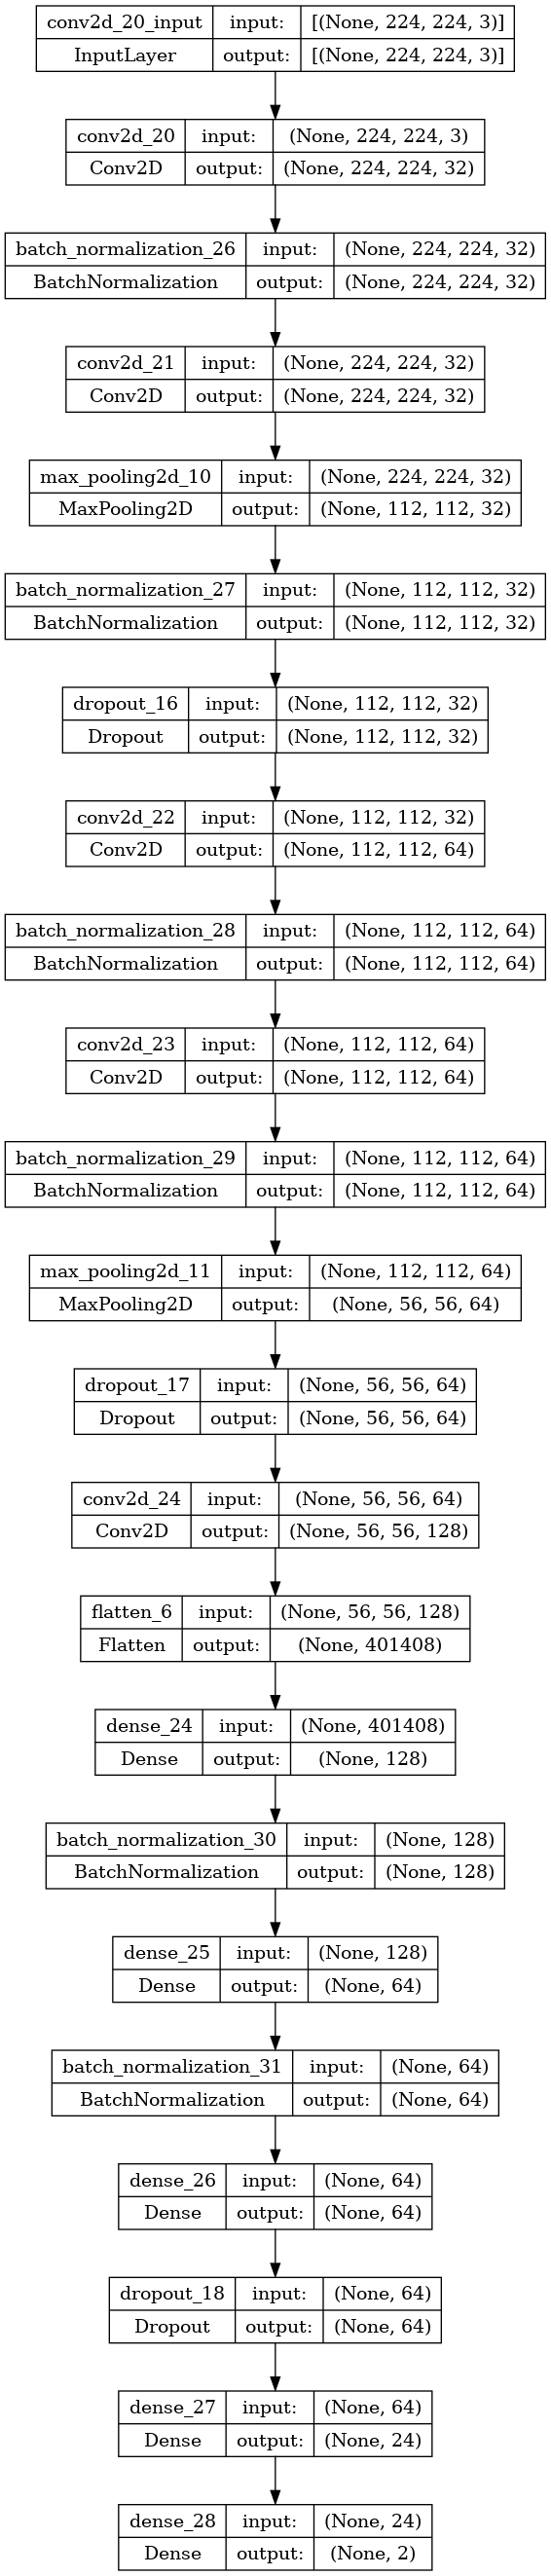

In [ ]:
# Here plot the model by using library plot model.
plot_model(model3, to_file='model_for_cnn.png', show_shapes=True)

In [38]:
# Compile the model3
model3.compile(Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=metrics)

#### Fiting the model and start training it into oure data training

In [39]:
history = model3.fit(
                                            train_images,                 # Train image
                                            validation_data=val_images,   # That is the validation data
                                            epochs=15,                    # That is the number of epoch that the model will start train form it.

)

Epoch 1/15
32/32 [==============================] - 25s 454ms/step - loss: 0.6096 - accuracy: 0.5218 - precision: 0.4793 - recall: 0.5852 - tp: 845.0000 - tn: 1970.0000 - fn: 599.0000 - fp: 918.0000 - val_loss: 0.8825 - val_accuracy: 0.3889 - val_precision: 0.4495 - val_recall: 0.5833 - val_tp: 147.0000 - val_tn: 324.0000 - val_fn: 105.0000 - val_fp: 180.0000
Epoch 2/15
32/32 [==============================] - 9s 290ms/step - loss: 0.4718 - accuracy: 0.6970 - precision: 0.7075 - recall: 0.6228 - tp: 629.0000 - tn: 1760.0000 - fn: 381.0000 - fp: 260.0000 - val_loss: 0.5843 - val_accuracy: 0.5437 - val_precision: 0.4848 - val_recall: 0.6944 - val_tp: 175.0000 - val_tn: 318.0000 - val_fn: 77.0000 - val_fp: 186.0000
Epoch 3/15
32/32 [==============================] - 9s 288ms/step - loss: 0.4048 - accuracy: 0.7624 - precision: 0.7912 - recall: 0.7089 - tp: 716.0000 - tn: 1831.0000 - fn: 294.0000 - fp: 189.0000 - val_loss: 0.5507 - val_accuracy: 0.5714 - val_precision: 0.5253 - val_recall: 

##### Plot the figure for the CNN Model.

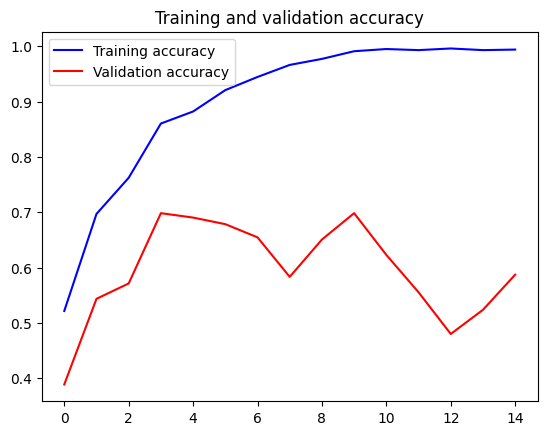

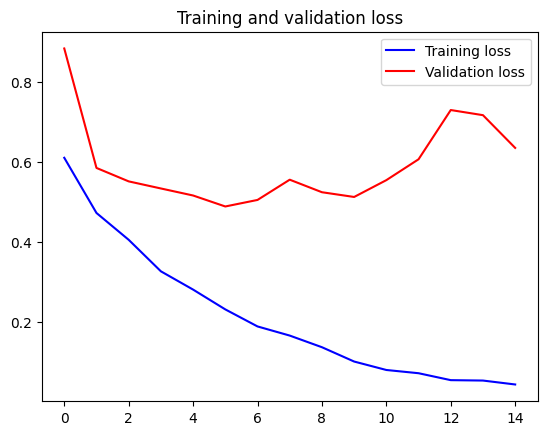

In [40]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.title('Training and validation loss')
plt.legend()
plt.show()

In [41]:
# Testing the model and evalute it
model3.evaluate(test_images)

10/10 [==============================] - 2s 180ms/step - loss: 0.5690 - accuracy: 0.6392 - precision: 0.6296 - recall: 0.6456 - tp: 204.0000 - tn: 512.0000 - fn: 112.0000 - fp: 120.0000


[0.5690371990203857,
 0.6392405033111572,
 0.6296296119689941,
 0.6455696225166321,
 204.0,
 512.0,
 112.0,
 120.0]

### Model Prediction

In [42]:
# Predict the label of the test_images
pred = model3.predict(test_images)
pred = np.argmax(pred,axis=1)

# Here I work on maping the labels
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred_label = [labels[k] for k in pred]

# Display the result that will achive it form the model.
print(f'The first 5 predictions: {pred[:5]}')

10/10 [==============================] - 2s 173ms/step
The first 5 predictions: [0 2 0 0 2]


### Show the image that the model here pridict

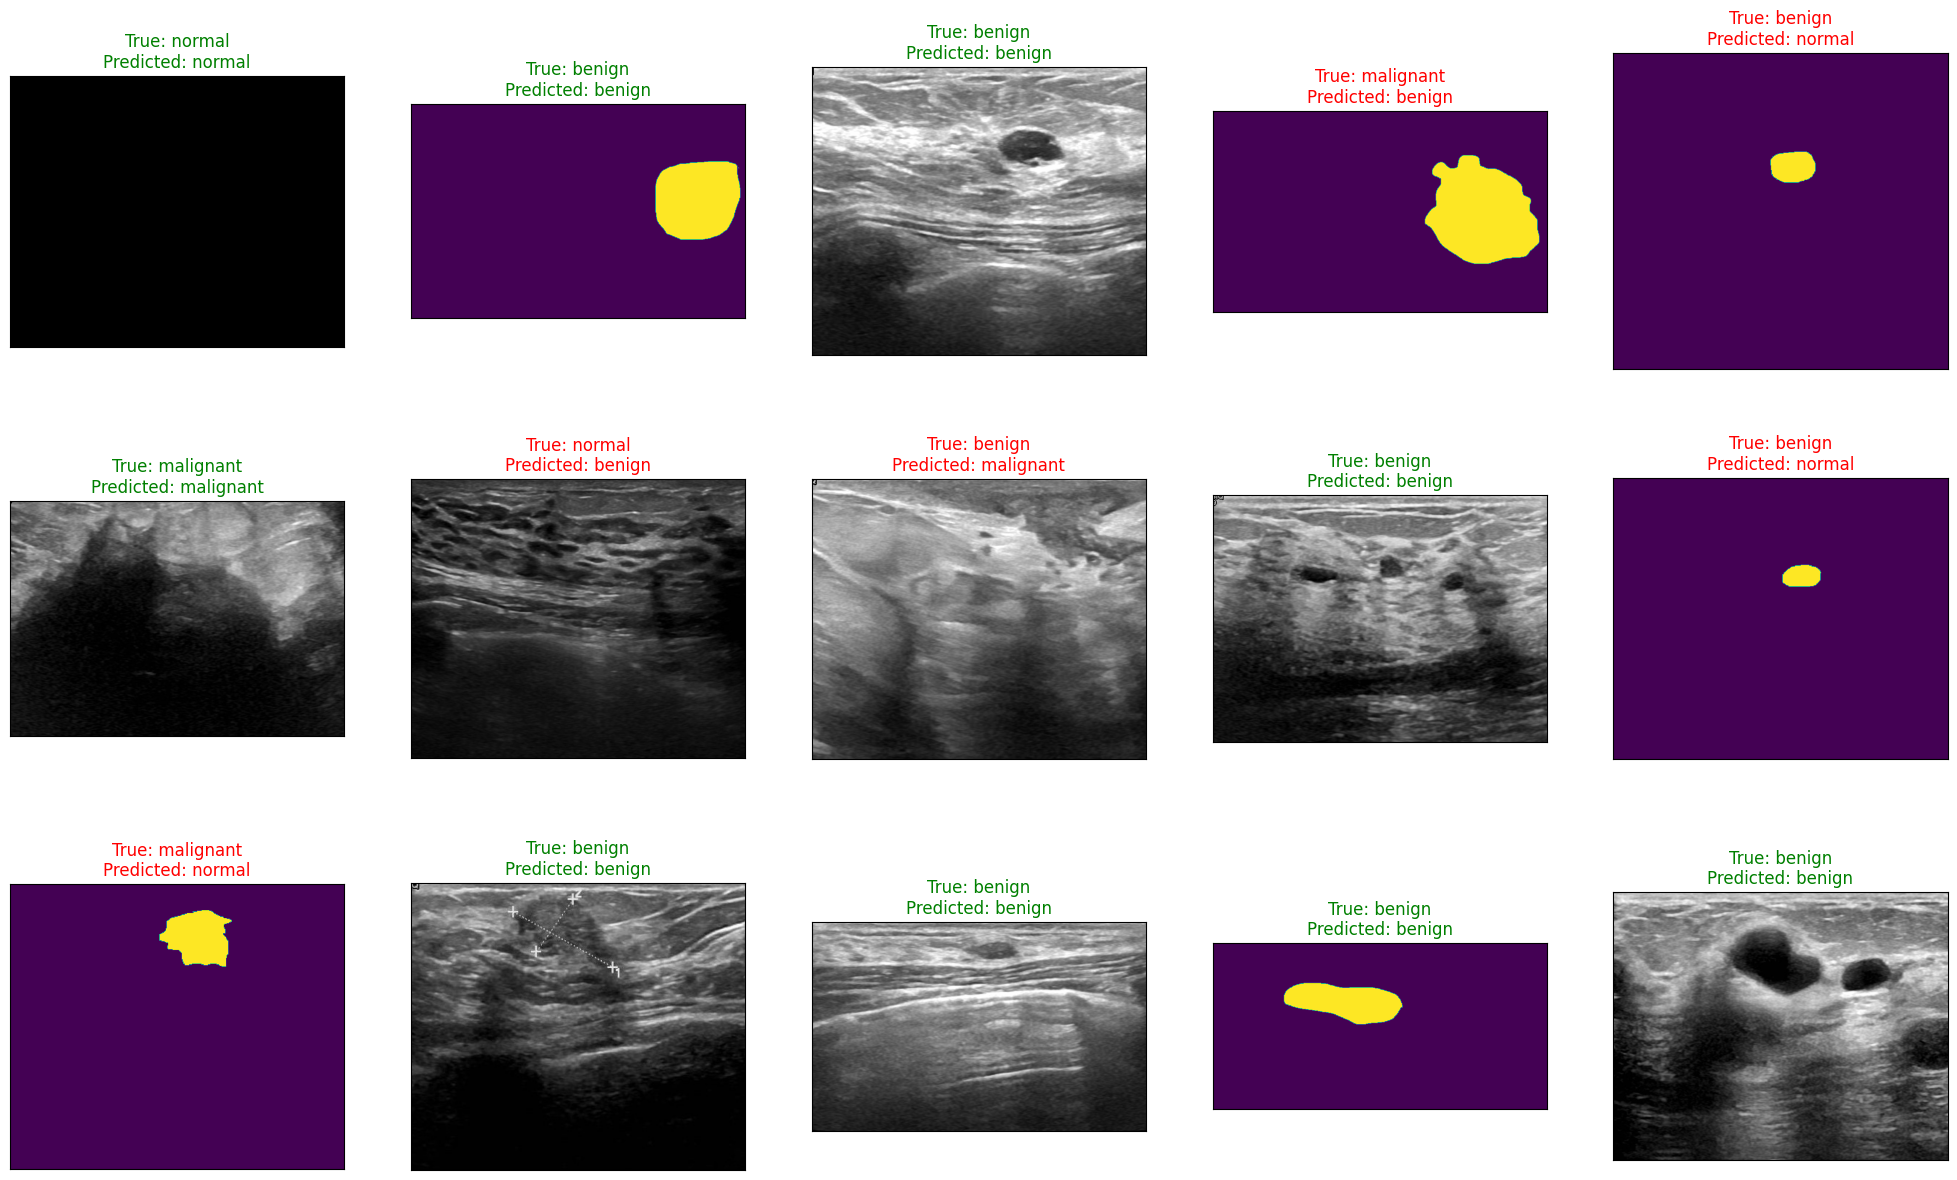

<Figure size 640x480 with 0 Axes>

In [43]:
# Display 25 random pictures from the dataset with their labels
random_index = np.random.randint(0, len(test_df) - 1, 15)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[random_index[i]]))
    if test_df.Label.iloc[random_index[i]] == pred_label[random_index[i]]:
        color = "green"
    else:
        color = "red"
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred_label[random_index[i]]}", color=color)
plt.show()
plt.tight_layout()

#### Classification Report

In [44]:
print(classification_report(test_images.classes, pred))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       165
           1       0.88      0.32      0.47        88
           2       0.53      0.76      0.62        63

    accuracy                           0.64       316
   macro avg       0.69      0.61      0.60       316
weighted avg       0.69      0.64      0.62       316



In [45]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, weight='bold', fontsize=16)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=12, weight='bold',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=16, weight='bold')
    plt.xlabel('Predicted label', fontsize=16, weight='bold')

Normalized confusion matrix


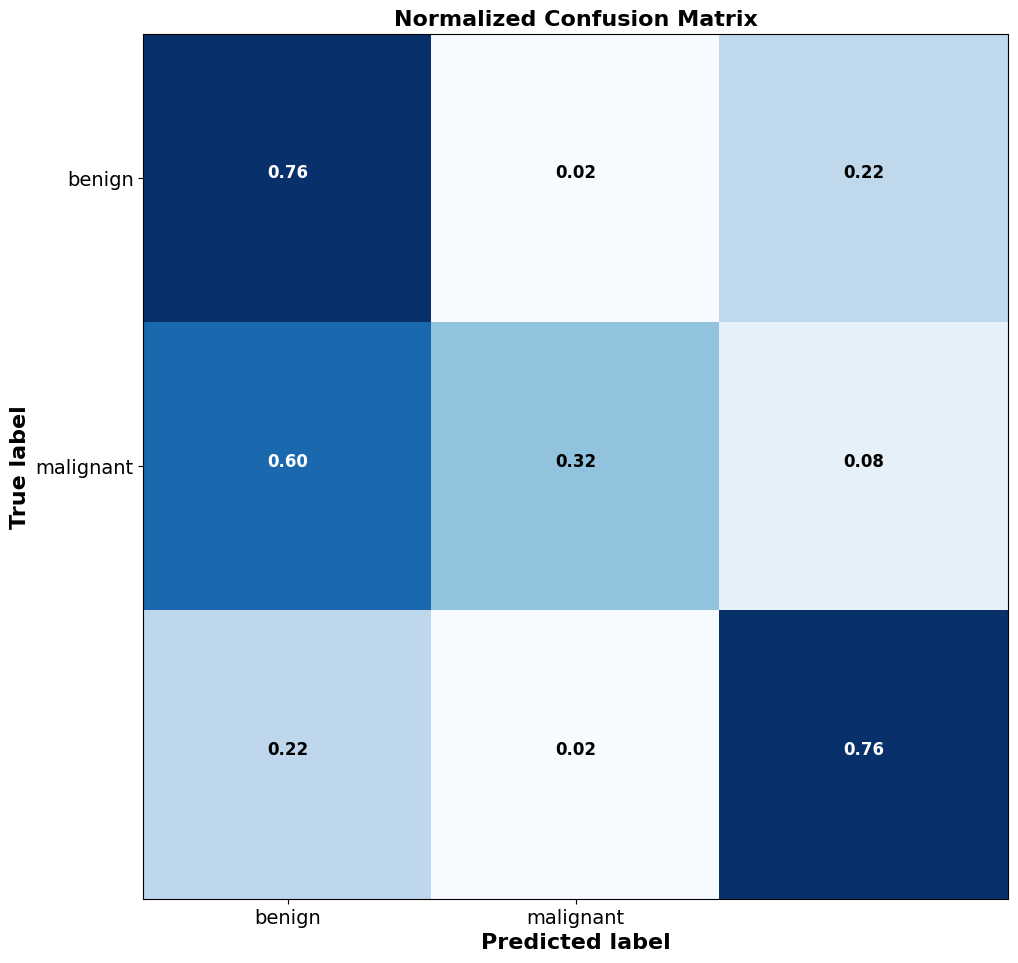

In [46]:
# Here I work to compute the confusion matrix
cnf_matrix = confusion_matrix(test_images.classes, pred) # here it take the class names and actual predict for the model.
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))   # Here I set the Size for the figure I set(40,40) becouse the number of class is verey big, to show the all class.
plot_confusion_matrix(cnf_matrix, classes=['benign','malignant'],   # This is the class that we have in the data set and work here.
                                               normalize=True,
                                                title='Normalized Confusion Matrix')
plt.show()